                                                    Implementation of ANN using Keras

In [1]:
# Importing Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
import keras
print(keras.__version__)


2.13.1


In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


 GPU / CPU Check

In [4]:
tf.config.list_physical_devices("GPU")

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
# check_list = ['GPU','CPU']

# for device in check_list:
#   out = tf.config.list_physical_devices(device)
#   if len(out) > 0:
#     print(f"{device} is available!")
#     print(f"Details >> {out}")
#   else:
#     print(f"{device} isn't available!")

In [7]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Creating a simple classifier using keras on MNIST data

In [8]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [9]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
len(X_test[1][0])

28

In [12]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [13]:
len(X_train_full[5000:] )

55000

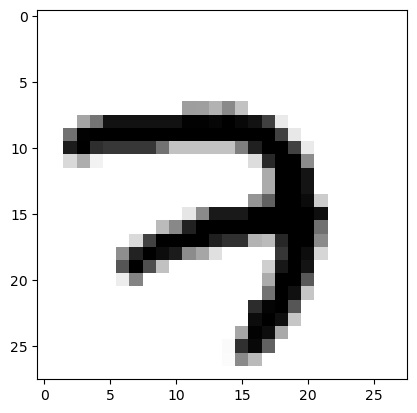

In [14]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

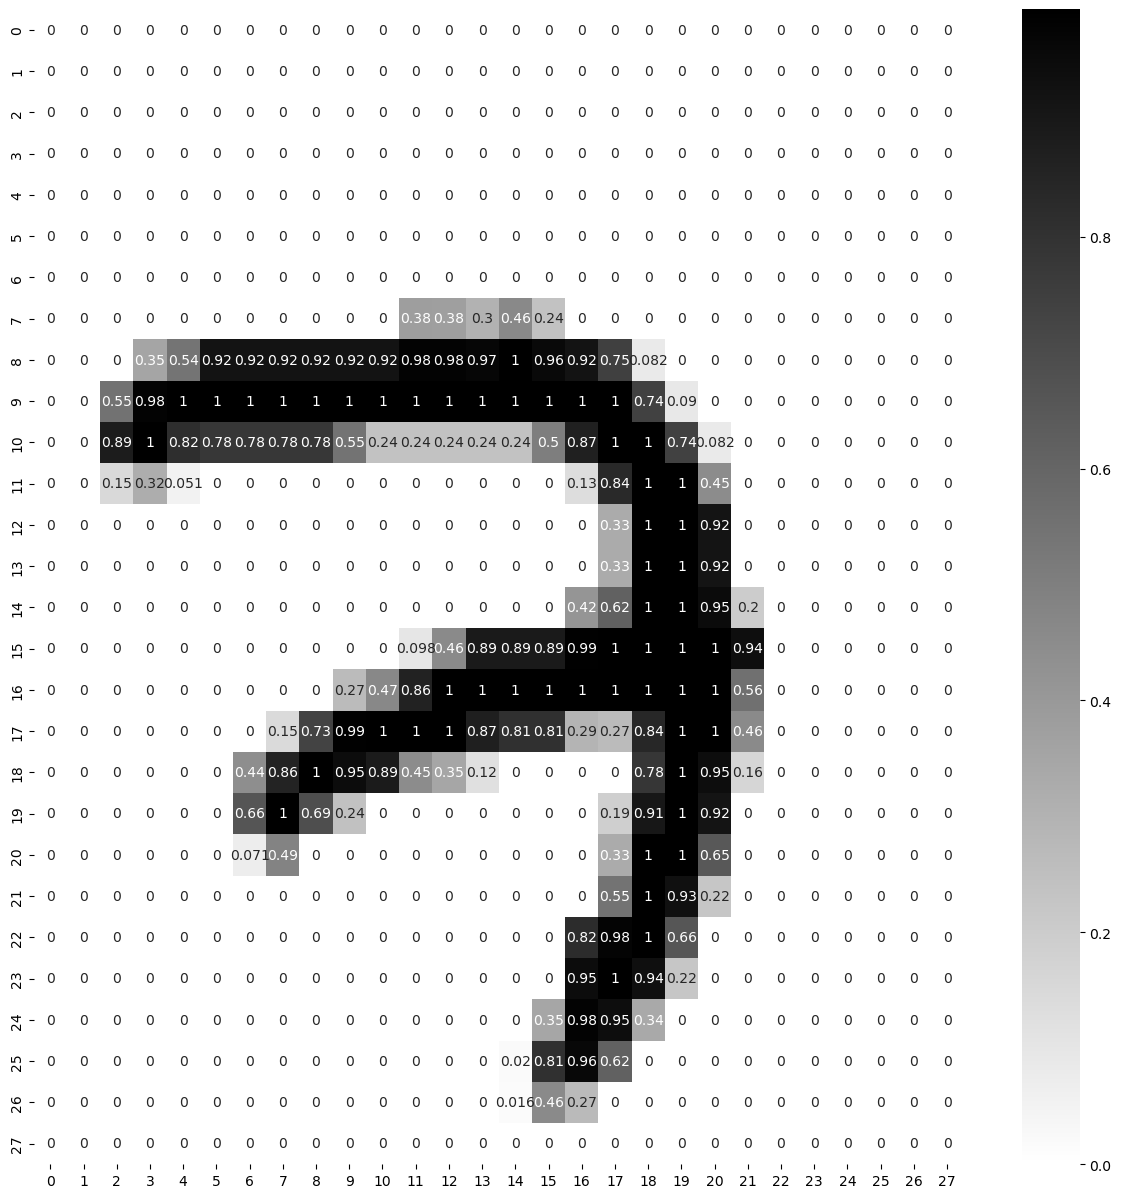

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architechture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500" 
height="300">

In [16]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [17]:
model_clf.layers

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [20]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [21]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [22]:
len(hidden1.get_weights()[1])

300

In [23]:
hidden1.get_weights()

[array([[ 0.06457245,  0.06491664, -0.02975672, ..., -0.04025746,
          0.00351632, -0.04200475],
        [-0.04950548, -0.04093074, -0.04114723, ..., -0.0607278 ,
         -0.04513226,  0.01192833],
        [-0.06666529,  0.04673816,  0.05169944, ..., -0.07346375,
          0.05018743, -0.01788217],
        ...,
        [ 0.06558008, -0.0061547 ,  0.05162735, ..., -0.0179062 ,
          0.02897705, -0.03708141],
        [ 0.06100117,  0.01638188,  0.07245834, ...,  0.01050157,
         -0.04191779, -0.07112578],
        [-0.03896513, -0.02817626, -0.07359641, ..., -0.05570048,
          0.01405207,  0.07208797]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.06457245,  0.06491664, -0.02975672, ..., -0.04025746,
         0.00351632, -0.04200475],
       [-0.04950548, -0.04093074, -0.04114723, ..., -0.0607278 ,
        -0.04513226,  0.01192833],
       [-0.06666529,  0.04673816,  0.05169944, ..., -0.07346375,
         0.05018743, -0.01788217],
       ...,
       [ 0.06558008, -0.0061547 ,  0.05162735, ..., -0.0179062 ,
         0.02897705, -0.03708141],
       [ 0.06100117,  0.01638188,  0.07245834, ...,  0.01050157,
        -0.04191779, -0.07112578],
       [-0.03896513, -0.02817626, -0.07359641, ..., -0.05570048,
         0.01405207,  0.07208797]], dtype=float32)

In [26]:
print("shape\n", biases.shape)

shape
 (300,)


In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [28]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6057 - accuracy: 0.8450 - val_loss: 0.3032 - val_accuracy: 0.9154
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2839 - accuracy: 0.9189 - val_loss: 0.2394 - val_accuracy: 0.9344
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2339 - accuracy: 0.9330 - val_loss: 0.2023 - val_accuracy: 0.9458
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2010 - accuracy: 0.9429 - val_loss: 0.1786 - val_accuracy: 0.9514
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.1760 - accuracy: 0.9501 - val_loss: 0.1611 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1571 - accuracy: 0.9552 - val_loss: 0.1463 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1409 - accuracy: 0.9597 - val_loss: 0.1368 - val_accuracy

In [29]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.605725,0.844982,0.303210,0.9154
1,0.283870,0.918873,0.239366,0.9344
2,0.233872,0.933000,0.202340,0.9458
3,0.200954,0.942855,0.178632,0.9514
4,0.176019,0.950073,0.161097,0.9562
5,0.157092,0.955182,0.146281,0.9616
6,0.140861,0.959691,0.136836,0.9618
7,0.128204,0.963200,0.127818,0.9644
8,0.117334,0.966745,0.118781,0.9676
9,0.107637,0.969655,0.112005,0.9688


<Axes: >

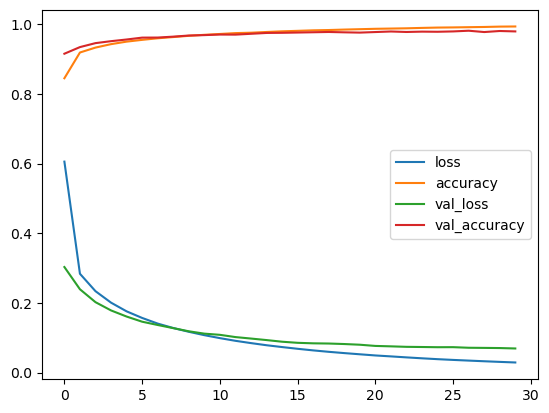

In [31]:
pd.DataFrame(history.history).plot()

In [32]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9774


[0.07087129354476929, 0.977400004863739]

In [33]:
x_new = X_test[:3]
# x_new

In [34]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [35]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 206ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [36]:
y_prob

array([[9.5601115e-07, 2.7988273e-08, 2.2928672e-05, 2.7838565e-04,
        2.0474502e-09, 1.7449909e-06, 2.1189377e-11, 9.9968457e-01,
        3.7837628e-06, 7.6422602e-06],
       [2.5929430e-06, 2.2068566e-04, 9.9921596e-01, 5.3646002e-04,
        1.5415736e-11, 2.7952368e-07, 2.4746730e-06, 2.2114225e-11,
        2.1500118e-05, 1.1706929e-12],
       [7.0476121e-06, 9.9783546e-01, 1.6383025e-04, 3.2896081e-05,
        8.6280954e-05, 5.1009733e-06, 2.1521539e-05, 1.2157272e-03,
        6.2396127e-04, 8.1387325e-06]], dtype=float32)

In [37]:
y_pred = np.argmax(y_prob, axis = -1)

In [38]:
y_pred



array([7, 2, 1], dtype=int64)

In [39]:
y_pred

array([7, 2, 1], dtype=int64)

In [40]:
actual

array([7, 2, 1], dtype=uint8)

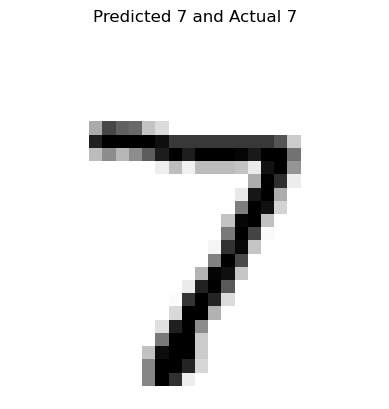

######################


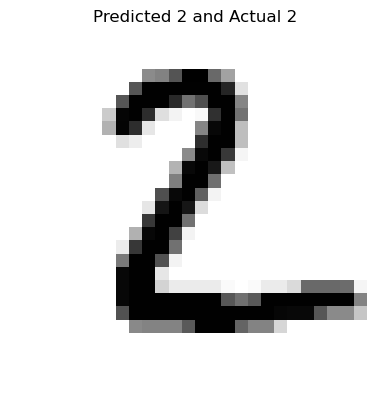

######################


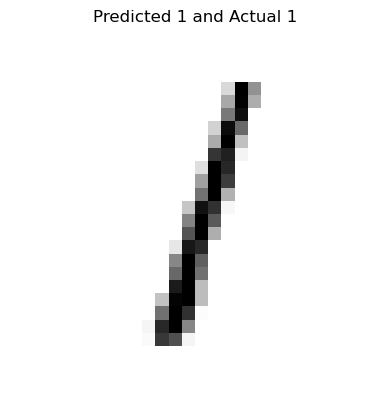

######################


In [41]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")